<span style="font-size:24pt; color:black">Notes</span>

<ul style="font-size:16pt; color:black">
    <li>Generate pboxes for total projections (primary use case)</li>
    <li>Generate pboxes for individual components (limited set of users)</li>
</ul>

---

In [1]:
import fun_plot as fn

---
##### <font color=blue> IP:: Load Data  </font>
---

In [2]:
loc=0
#
path='/scratch/pk695/FACTS/002_fork/facts/JupNbk/000_pk-JupNb_TESTspace/2023-01_NZ_INSAR/001_Pbox/004_CI_files/medium_confidence/'
sspDIR = [path+'ssp126/',path+'ssp585/']
#
# doscens = ['ssp126', 'ssp585']
scentitles = ['SSP1-2.6', 'SSP5-8.5']

---
##### <font color=blue> PLOT::   </font>
---

In [3]:
import numpy as np    
import xarray as xr
import matplotlib.pyplot as plt
import glob

In [4]:
colors = {
    'ssp119' : np.array([0, 173, 207]) / 255,
    'ssp126' : np.array([23, 60, 102]) / 255,
    'ssp245' : np.array([247, 148, 32]) / 255,
    'ssp370' : np.array([149, 27, 30]) / 255,
    'ssp585' : np.array([231, 29, 37]) / 255
}

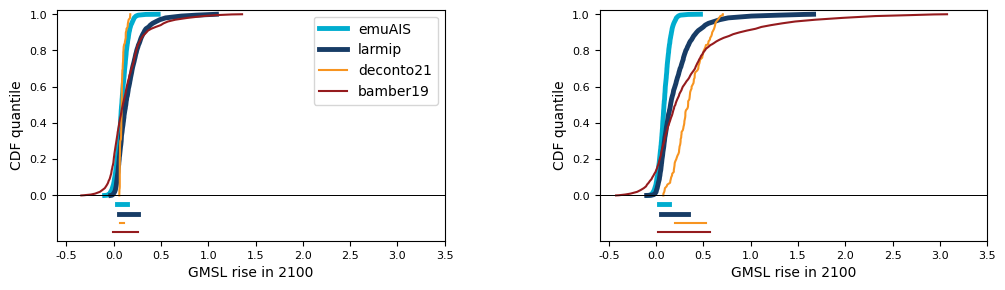

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3)); 
plt.subplots_adjust(wspace=0.4, hspace=0.2)
#
ssp=['ssp126','ssp585']
for ss0,ss1 in enumerate(ssp):
    #
    ax= axes[ss0]
    #
    path='/scratch/pk695/FACTS/002_fork/facts/JupNbk/000_pk-JupNb_TESTspace/2023-01_NZ_INSAR/001_Pbox/002_quant_workflows/'
    files=[path+f'wf_1e/{ss1}/coupling.{ss1}.emuAIS.emulandice.AIS_globalsl.nc',
           path+f'wf_2e/{ss1}/coupling.{ss1}.larmip.larmip.AIS_globalsl.nc',
           path+f'wf_3e/{ss1}/coupling.{ss1}.deconto21.deconto21.AIS_AIS_globalsl.nc',
           path+f'wf_4/{ss1}/coupling.{ss1}.bamber19.bamber19.icesheets_AIS_globalsl.nc']
    # files = glob.glob(sspDIR[0] + '/*.nc')
    sls     = np.empty((0, 0))
    Qvals   = np.empty((0, 0))
    label   = []
    #
    for fi0,fi1 in enumerate(files):
        #
        lab=fi1.split('/')[-1].split('.')[2]
        # ................................................................
        # Exract Data.
        dataset = xr.open_dataset(fi1)
        time    = dataset['years'].values
        subt    = np.where(time == 2100)[0][0]
        quant   = dataset['quantiles'].values
        subq    = np.where(np.isin(quant, [0.17,0.83]))[0]
        qlevs = np.arange(0.01, 1, 0.01)
        #
        sl      = dataset['sea_level_change'].values[:,subt,loc].T
        qvals   = np.percentile(sl, qlevs * 100)
        if sls.size == 0: 
            sls = sl
            label=lab
            Qvals=qvals
        else: 
            sls=np.vstack([sls,sl])
            label=np.vstack([label,lab])
            Qvals=np.vstack([Qvals,qvals])
        # ................................................................
    lws = [2, 2, 1, 1] * 2
    color_list = list(colors.values())[:5]; 
    # ................................................................
    fnt=8
    for sss in range(4):
        xx=sls[sss,:]/1000
        xx1=sls[sss,subq]/1000
        yy=quant
        yy1 = [-0.05 * sss-0.05] * 2
        # ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        current_color = color_list[sss]
        if sss < 2: linewidth = 3.5  
        else: linewidth = 1.5
        # ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        # PLOT 
        ax.plot(xx, yy, color=current_color, linewidth=linewidth,label=label[sss, 0])
        ax.plot(xx1,yy1,color=current_color, linewidth=linewidth)
        # hp, = ax.plot(Qvals[sss,:] / 1000, qlevs, color=current_color, linewidth=linewidth,label=label[sss, 0])
        # ax.plot(Qvals[sss,subq] / 1000, [-0.05 * sss] * 2, color=current_color, linewidth=linewidth)
        # ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        # Set x-axis label and limits
        ax.set_xlabel('GMSL rise in 2100', fontsize=fnt+2)
        ax.set_ylabel('CDF quantile', fontsize=fnt+2)
        ax.set_xlim(-0.6, 3.5)
        ax.set_ylim(-0.25, 1.025)
        x_ticks= np.around(np.arange(-0.5, 3.6, .5), decimals=1); ax.set_xticks(x_ticks);  ax.set_xticklabels(x_ticks,fontsize=fnt, rotation=0)
        y_ticks= np.around(np.arange(0,1.1,0.2), decimals=1) ; ax.set_yticks(y_ticks);  ax.set_yticklabels(y_ticks,fontsize=fnt) 
        ax.axhline(0, color='black', linestyle='-', linewidth=0.5)
        if ax==axes[0]: ax.legend() 
    #
plt.show()

<div style="background-color: black; padding: 10px; border: 2px solid white; font-weight: bold;">
    Plot panel1
</div>

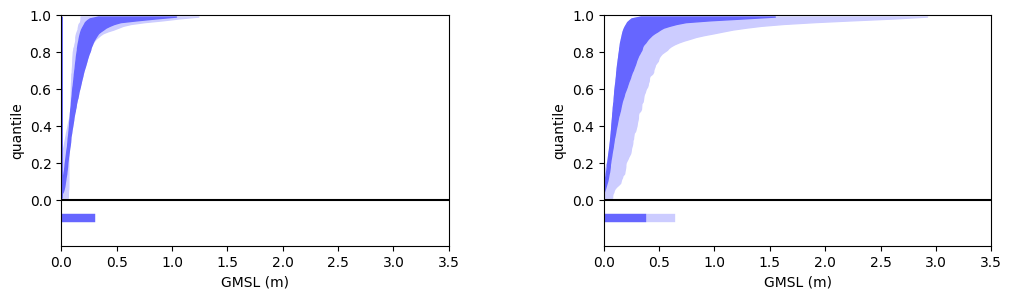

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3)); 
plt.subplots_adjust(wspace=0.4, hspace=0.2)
#
ssp=['ssp126','ssp585']
for ss0,ss1 in enumerate(ssp):
    #
    ax= axes[ss0]
    #
    path='/scratch/pk695/FACTS/002_fork/facts/JupNbk/000_pk-JupNb_TESTspace/2023-01_NZ_INSAR/001_Pbox/002_quant_workflows/'
    files=[path+f'wf_1e/{ss1}/coupling.{ss1}.emuAIS.emulandice.AIS_globalsl.nc',
           path+f'wf_2e/{ss1}/coupling.{ss1}.larmip.larmip.AIS_globalsl.nc',
           path+f'wf_3e/{ss1}/coupling.{ss1}.deconto21.deconto21.AIS_AIS_globalsl.nc',
           path+f'wf_4/{ss1}/coupling.{ss1}.bamber19.bamber19.icesheets_AIS_globalsl.nc']
    # files = glob.glob(sspDIR[0] + '/*.nc')
    sls     = np.empty((0, 0))
    Qvals   = np.empty((0, 0))
    label   = []
    #
    for fi0,fi1 in enumerate(files):
        #
        lab=fi1.split('/')[-1].split('.')[2]
        # ................................................................
        # Exract Data.
        dataset = xr.open_dataset(fi1)
        time    = dataset['years'].values
        subt    = np.where(time == 2100)[0][0]
        # quant   = dataset['quantiles'].values
        qlevs = np.arange(0.01, 1, 0.01)
        # subq    = np.where(np.isin(qlevs, [0.17,0.83]))[0]
        subq = np.where((np.around(qlevs,decimals=2) == 0.17) | (np.around(qlevs,decimals=2) == 0.83))[0]
        #
        sl      = dataset['sea_level_change'].values[:,subt,loc].T
        qvals   = np.percentile(sl, qlevs * 100)
        if sls.size == 0: 
            sls = sl
            label=lab
            Qvals=qvals
        else: 
            sls=np.vstack([sls,sl])
            label=np.vstack([label,lab])
            Qvals=np.vstack([Qvals,qvals])
    #
    # P-box ................................
    pbox1l = np.min(Qvals[:2, :], axis=0)
    pbox1h = np.max(Qvals[:2, :], axis=0)
    pbox2l = np.min(Qvals, axis=0)
    pbox2h = np.max(Qvals, axis=0)
    # ......................................
    
    ax.fill_betweenx(np.concatenate([qlevs,qlevs[::-1]]), np.concatenate([pbox2l, pbox2h[::-1]]) / 1000,  color=[0.8, 0.8, 1])
    ax.fill_betweenx(np.concatenate([qlevs,qlevs[::-1]]), np.concatenate([pbox1l, pbox1h[::-1]]) / 1000,  color=[0.4, 0.4, 1])
    
    ax.plot([pbox2l[subq[0]] / 1000, pbox2h[subq[1]] / 1000], [-0.1, -0.1], color=[0.8, 0.8, 1], linewidth=6)
    ax.plot([pbox1l[subq[0]] / 1000, pbox1h[subq[1]] / 1000], [-0.1, -0.1], color=[0.4, 0.4, 1], linewidth=6)
    
    ax.plot([0, 4], [0, 0], color='black', linestyle='-')
    ax.set_xlim([0, 3.5]); #ax.set_xlim([-.5, 3.5])
    ax.set_ylim([-0.25, 1])
    ax.set_yticks(np.arange(0, 1.1, 0.2))
    ax.set_xlabel('GMSL (m)')
    ax.set_ylabel('quantile')
    plt.box(on=True)
plt.show()